<a href="https://colab.research.google.com/github/Skyreacher-hub/Blockchain-Cryptocurrency_Data_Analysis/blob/main/Frequency_Analysis_RiskTag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/compiled_risk_data cleaned.xlsx')

In [ ]:
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                966 non-null    object
 1   Smart contract address                      966 non-null    object
 2   Blog post link                              966 non-null    object
 3   Audit website                               966 non-null    object
 4   Chain                                       966 non-null    object
 5   Is_closed_source                            966 non-null    bool  
 6   hidden_owner                                966 non-null    bool  
 7   anti_whale_modifiable                       966 non-null    bool  
 8   Is_anti_whale                               966 non-null    bool  
 9   Is_honeypot                                 966 non-null    bool  
 10  buy_tax                   

In [ ]:
df['Is_closed_source'].value_counts()

,count
Is_closed_source,
False,820
True,146


In [ ]:
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths']


In [ ]:
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]

In [ ]:
frequencies = frequencies.fillna(0)
frequencies

,True
Is_closed_source,146
hidden_owner,150
anti_whale_modifiable,112
Is_anti_whale,138
Is_honeypot,89
buy_tax,117
sell_tax,119
slippage_modifiable,139
Is_blacklisted,76
can_take_back_ownership,181


<ipython-input-32-75d224d032f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


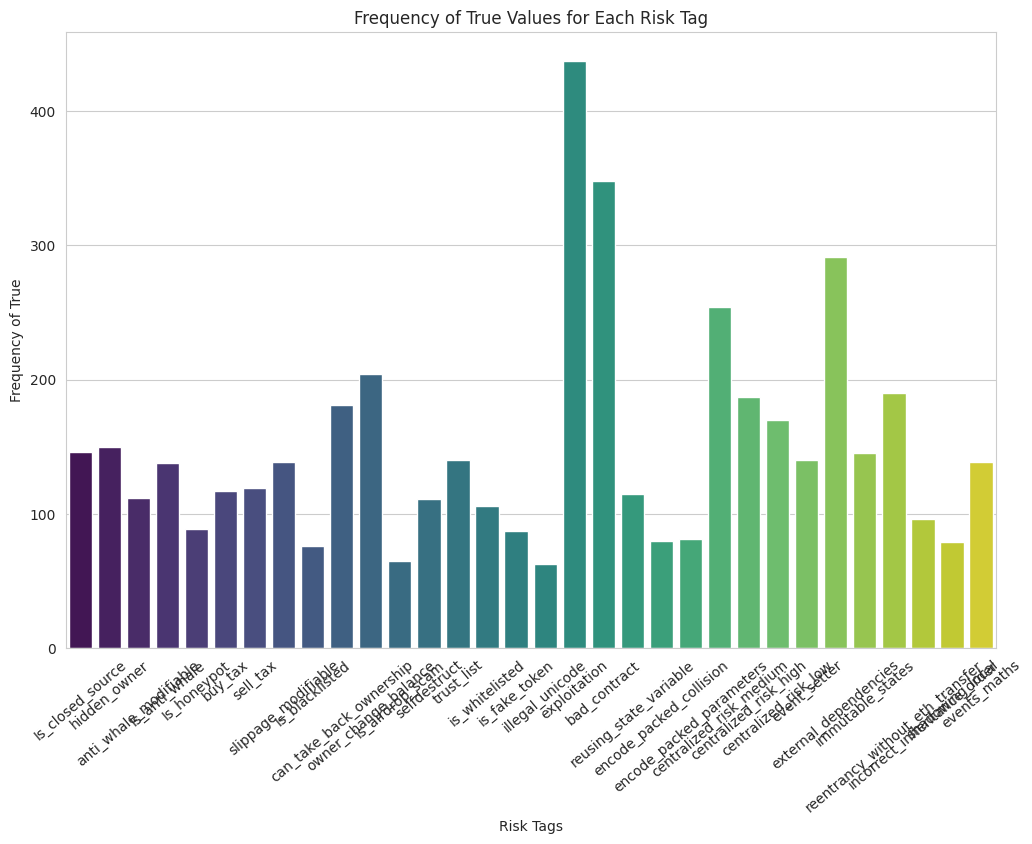

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=40)
plt.show()

In [ ]:
def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    # Calculate the phi coefficient from the contingency table
    chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]
    n = np.sum(np.sum(contingency_table))
    phi = np.sqrt(chi2 / n)
    return phi


In [ ]:
risk_df = df[risk_columns]

In [ ]:
phi_matrix = pd.DataFrame(index=risk_df.columns, columns=risk_df.columns)

In [ ]:
for var1 in risk_df.columns:
    for var2 in risk_df.columns:
        phi_matrix.loc[var1, var2] = phi_coefficient(risk_df[var1], risk_df[var2])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

In [ ]:
print("Phi coefficients calculated for all pairs of variables:")
phi_matrix

Phi coefficients calculated for all pairs of variables:


,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.369707,0.34369,0.31503,0.395213,0.321702,0.387056,0.395185,0.338289,0.271407,...,0.155005,0.217522,0.222421,0.359928,0.132404,0.275804,0.249272,0.342857,0.369769,0.304606
hidden_owner,0.369707,1.0,0.371478,0.355905,0.327921,0.454088,0.421995,0.418722,0.299374,0.372806,...,0.204905,0.332508,0.207183,0.302542,0.129669,0.22795,0.262443,0.335285,0.299703,0.190696
anti_whale_modifiable,0.34369,0.371478,1.0,0.535935,0.443638,0.460189,0.523431,0.625384,0.338538,0.339862,...,0.231735,0.346325,0.180772,0.37446,0.185076,0.300448,0.308876,0.366061,0.411102,0.302945
Is_anti_whale,0.31503,0.355905,0.535935,1.0,0.371162,0.501289,0.513076,0.506928,0.342199,0.281594,...,0.219838,0.294149,0.199763,0.336146,0.170411,0.383366,0.274307,0.34892,0.385557,0.29621
Is_honeypot,0.395213,0.327921,0.443638,0.371162,1.0,0.386395,0.414252,0.389505,0.478584,0.287333,...,0.19187,0.224409,0.275755,0.367073,0.212121,0.387233,0.319624,0.456501,0.440468,0.35891
buy_tax,0.321702,0.454088,0.460189,0.501289,0.386395,1.0,0.710421,0.44445,0.339349,0.32588,...,0.239542,0.291915,0.220048,0.288812,0.157363,0.359222,0.255331,0.353937,0.387091,0.290769
sell_tax,0.387056,0.421995,0.523431,0.513076,0.414252,0.710421,1.0,0.465559,0.381838,0.272054,...,0.291278,0.310623,0.23208,0.328858,0.179544,0.353964,0.337524,0.328215,0.428375,0.295047
slippage_modifiable,0.395185,0.418722,0.625384,0.506928,0.389505,0.44445,0.465559,1.0,0.285535,0.362478,...,0.237516,0.329146,0.244272,0.384194,0.206535,0.314914,0.346225,0.346893,0.41581,0.327725
Is_blacklisted,0.338289,0.299374,0.338538,0.342199,0.478584,0.339349,0.381838,0.285535,1.0,0.243977,...,0.157359,0.333676,0.177963,0.360284,0.185259,0.297033,0.261676,0.378464,0.431951,0.29649
can_take_back_ownership,0.271407,0.372806,0.339862,0.281594,0.287333,0.32588,0.272054,0.362478,0.243977,1.0,...,0.243507,0.362326,0.216989,0.292162,0.135742,0.303278,0.222914,0.354816,0.311711,0.24154


In [ ]:
plt.figure(figsize=(14, 12))

<Figure size 1400x1200 with 0 Axes>

<Figure size 1400x1200 with 0 Axes>

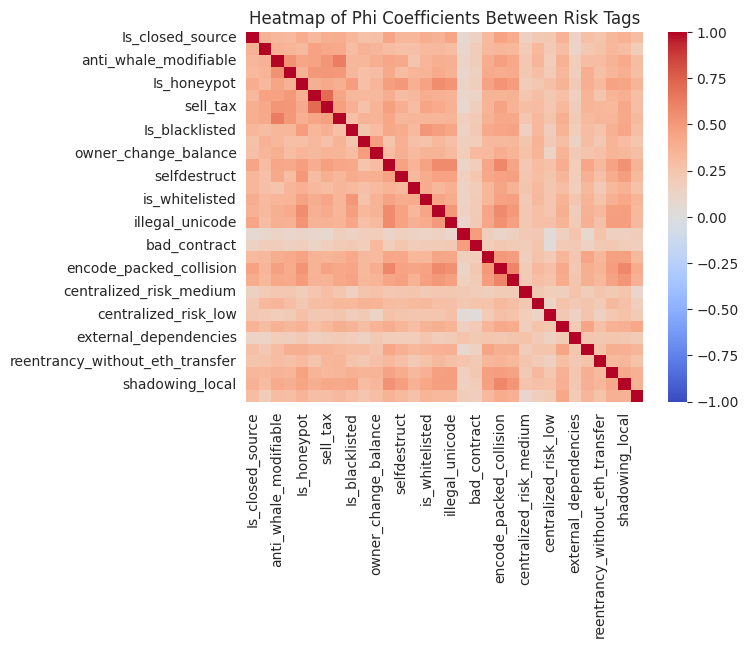

In [ ]:
sns.heatmap(phi_matrix.astype(float), annot=False, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Phi Coefficients Between Risk Tags')
plt.show()